# PHASE 4 GROUP v PROJECT - TIME SERIES MODELING USING ZILLOW HOUSING DATA 🏘️.
`Student Names:`
  - Silvia Gworit
  - Dennis Mwenda
  - Myra Kadenge
  - Paul Muniu


## **1. BUSINESS UNDERSTANDING.**

### 1.1 Introduction

The global marketplace has witnessed everchanging trends in different industries, and the real estate sector is no exception.To remain relevant and increase profitability in the Real estate market it is advantageous for leading Real Estate companies to study this trends so as to stay ahead. Happy Homes Partners are investors in the real estate market and have acknowledged that data science plays a pivotal role by uncovering hidden investment opportunities and steering clients towards profitable ventures.

### 1.2 Business Problem

Happy Homes Partners is looking to expand their property investments and are looking for optimal locations for their investment. We as Tech to Tech hub have a primary objective to facilitate informed real estate investment decisions for the Happy Homes Partners. Using the extensive housing dataset from Zillow, covering the period from April 1996 to April 2018, the project seeks to pinpoint the top 5 zip codes with the most promising investment potential.

### 1.3 Objectives
a) Main Objective
1. To Investigate and establish the 5 best ZipCodes(Regions) that are the best for Happy Homes Partners to invest in.

b) Specific Objective

1. To identify the top 5 best performing zipcodes with the highest ROI.

2. To develop time series models to forecast real estate prices for different zip codes over various time horizons.

3. To evaluate the performance of time series models using appropriate metrics, ensuring reliability and effectiveness in predicting real estate prices.


## **2. DATA UNDERSTANDING.**

We will be using the Zillow Housing dataset, a CSV file for this project.
The dataset covers a large period from April 1996 to April 2018, allowing us to study long-term trends and different market conditions. It's a valuable resource for analyzing how prices have changed over time and predicting future trends.

### 2.1 Summary of the Dataset

`RegionID` - This is unique Id for the Regions.

`SizeRank` - This is the ranking done based on the size of the Region.

`RegionName` - This field contains the zip code of the Region.

`RegionType` - Type of Region is Zip.

`StateName` - Names of the of the various states.

`City` - This column provide the specific City Name of Housing Data.

`Metro` - This provide the name of the metro city around that Region.

`County Name `- This is the County Name for that Region.

`Months Column` - These Columns contains the prices of Region for every month.

### 2.2 Data Inspection

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

#modeling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA        
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import TimeSeriesSplit 

# Custom Options for displaying rows.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',100)

In [24]:
# load the datasets
df = pd.read_csv('zillow_data.csv')

# View the first 5 rows
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,...,863900.0,872900.0,883300.0,889500.0,892800,893600,891300,889900,891500,893000,893000,895000,901200,909400,915000,916700,917700,919800,925800,937100,948200,951000,952500,958600,966200,970400,973900,974700,972600,974300,980800,988000,994700,998700,997000,993700,991300,989200,991300,999100,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,193400.0,193100.0,192700.0,193000.0,193700.0,194800.0,196100.0,197800.0,199700.0,201900.0,...,234200.0,235400.0,236600.0,238500.0,240500,242600,244700,246300,247600,249600,251400,253000,255200,258000,261200,264700,268400,271400,273600,275200,276400,277000,277900,280000,282600,285400,288400,290800,292000,292800,293700,295200,297000,299000,300800,301800,302800,304400,306200,307000,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,277000.0,283600.0,288500.0,293900.0,299200.0,304300.0,308600.0,311400.0,312300.0,311900.0,...,282100.0,284200.0,286000.0,288300.0,290700,293300,295900,298300,300200,301300,301700,302400,303600,306200,309100,311900,314100,316300,319000,322000,324300,326100,327300,327000,327200,328500,329800,330000,329000,327800,326700,325500,324700,324500,323700,322300,320700,320000,320000,320900,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,610100.0,618600.0,625600.0,631100.0,636600.0,642100.0,647600.0,653300.0,659300.0,665800.0,672900.0,...,1149900.0,1155200.0,1160100.0,1163300.0,1167700,1173900,1175100,1173500,1175500,1178500,1176400,1174600,1178500,1185700,1192900,1198800,1200400,1198900,1200200,1207400,1218600,1226600,1230700,1235400,1241300,1245700,1247000,1246700,1245700,1246000,1247700,1252900,1260900,1267900,1272600,1276600,1280300,1282500,1286000,1289000,1289800,1287700,1287400,1291500,1296600,129900

In [25]:
# View last 5 rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,92600.0,92600.0,92800.0,93100.0,93500.0,94000.0,94500.0,95100.0,95800.0,96500.0,97100.0,97800.0,98500.0,99200.0,100000.0,100800.0,101700.0,102600.0,103400.0,104200.0,104900.0,105600.0,106300.0,106800.0,107300.0,107800.0,108400.0,109000.0,109600.0,110200.0,110800.0,111400.0,112000.0,...,187600.0,187300.0,187300.0,188100.0,189600,190800,189800,188500,189400,191100,192400,193300,193400,192000,191200,190900,190900,191100,191900,191400,190700,190300,189500,188700,188600,189400,189600,189000,189000,190200,190700,190600,190300,193200,200200,206900,209600,211500,213600,215400,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,92200.0,92100.0,91900.0,91700.0,91300.0,90900.0,90500.0,90100.0,89800.0,89600.0,89400.0,89300.0,89200.0,89100.0,88900.0,88700.0,88400.0,88100.0,87700.0,87400.0,87200.0,87100.0,87100.0,87100.0,87200.0,87300.0,87300.0,87400.0,87300.0,87300.0,87200.0,87300.0,87400.0,87600.0,87900.0,88300.0,88700.0,89200.0,89600.0,90000.0,...,180000.0,180000.0,181400.0,181900.0,182200,183300,185800,187700,187500,184900,183000,181900,182300,184400,186300,188300,190800,191800,189500,187700,186800,186700,186900,186700,186400,186500,186700,186000,185400,184100,184500,186100,188700,190200,190900,191000,192200,194300,195500,197300,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,57700.0,58000.0,58200.0,58400.0,58700.0,59100.0,59500.0,59900.0,60300.0,60800.0,61300.0,62000.0,62600.0,63200.0,63800.0,64500.0,65200.0,65900.0,66700.0,67400.0,68200.0,69000.0,69800.0,70700.0,71500.0,72300.0,73000.0,73700.0,74300.0,74900.0,75500.0,76000.0,76400.0,76900.0,77300.0,77700.0,78000.0,78200.0,78400.0,78400.0,...,105100.0,105200.0,104800.0,104200.0,104200,104700,104600,104600,104800,104800,104600,104400,104400,105000,105900,106800,107500,107700,107800,108300,108600,108700,108900,109800,110700,111400,111900,113500,115200,116500,117600,118800,119600,120000,120500,120900,121200,120800,120700,121100,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,195000.0,196300.0,197700.0,199100.0,200700.0,202600.0,204900.0,207100.0,209100.0,211200.0,213400.0,215800.0,218300.0,221000.0,223900.0,226900.0,230300.0,234300.0,238700.0,243000.0,247300.0,251800.0,256300.0,260900.0,265500.0,270100.0,274500.0,278900.0,283200.0,287900.0,292700.0,297100.0,301100.0,305000.0,308700.0,312400.0,315900.0,319200.0,322400.0,325500.0,...,528900.0,532000.0,535200.0,538500.0,538300,543700,551400,552800,547100,537900,520700,517500,538300,552700,545800,536100,538300,537800,539000,543500,556000,559000,556400,549000,547700,549600,553100,555800,562700,567000,566700,569100,575800,581700,585400,590700,588000,592500,615900,647300,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,17600

In [26]:
# Look at the shape
df.shape

(14723, 272)

Our data has 14723 rows and 272 columns. The data is in a wide Format, evident by having columns 8 onwards being with dates. 

In [27]:
# Looking at more information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


Our data has 14723 entries ranging from 0 to 14722 with 272 columns with 3 main data types
1. 219 columns with floating point numbers
2. 49 columns with interger data types
3. 4 columns with object data types

In [28]:
# Looking at descriptive statistics of our dataset
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,...,1.466700e+04,1.466700e+04,1.466700e+04,1.466700e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,1.193454e+05,1.196851e+05,1.201213e+05,1.205442e+05,1.208966e+05,1.212682e+05,1.216559e+05,1.220531e+05,1.224563e+05,1.228799e+05,1.233274e+05,1.238231e+05,1.243537e+05,1.250026e+05,1.257367e+05,1.264508e+05,1.270863e+05,1.277364e+05,1.283850e+05,1.290327e+05,1.296764e+05,1.303245e+05,1.309826e+05,1.316781e+05,1.323993e+05,1.332247e+05,1.341336e+05,1.350209e+05,1.358416e+05,1.366838e+05,1.375321e+05,1.383918e+05,1.392652e+05,1.401606e+05,1.410848e+05,1.420701e+05,1.431040e+05,1.442613e+05,1.455221e+05,1.467723e+05,...,2.250826e+05,2.261248e+05,2.272320e+05,2.283106e+05,2.290993e+05,2.301417e+05,2.310600e+05,2.319275e+05,2.328221e+05,2.337123e+05,2.346912e+05,2.357603e+05,2.368364e+05,2.380098e+05,2.393542e+05,2.407441e+05,2.421035e+05,2.434244e+05,2.446583e+05,2.457646e+05,2.467650e+05,2.477652e+05,2.488964e+05,2.499873e+05,2.510143e+05,2.521643e+05,2.534836e+05,2.548201e+05,2.562058e+05,2.575979e+05,2.589460e+05,2.602543e+05,2.615769e+05,2.629238e+05,2.643733e+05,2.657551e+05,2.670651e+05,2.685335e+05,2.702268e+05,2.718247e+05,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,8.747981e+04,8.791269e+04,8.840935e+04,8.887373e+04,8.927704e+04,8.969700e+04,9.012583e+04,9.056147e+04,9.100389e+04,9.146850e+04,9.196320e+04,9.250608e+04,9.308367e+04,9.374830e+04,9.445247e+04,9.510499e+04,9.567485e+04,9.624843e+04,9.681400e+04,9.737949e+04,9.794880e+04,9.853754e+04,9.915791e+04,9.983302e+04,1.005517e+05,1.013752e+05,1.022670e+05,1.031269e+05,1.039398e+05,1.048064e+05,1.057199e+05,1.066999e+05,1.077590e+05,1.089064e+

## **3.DATA PREPARATION.**
### 3.1 Data Cleaning

In [29]:
# Convert Wide Format to Long format and checking on the first five rows
df = pd.melt(df,
                  id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'],
                  var_name='Date',
                  value_name='Value')

df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0


Duplicates and Missing Values.

In [30]:
# Helper function to check for duplicates and Missing Values
class DataFrameChecker:
    def __init__(self, data):
        
        self.data = data

    def check_duplicates(self):
        
        duplicates = self.data.duplicated().any()
        return duplicates

    def check_missing_values(self):
        
        missing_values = self.data.isnull().values.any()
        return missing_values
    
checker = DataFrameChecker(df)

# Check for duplicates and missing values
duplicates = checker.check_duplicates()
missing_values = checker.check_missing_values()

if duplicates:
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

if missing_values:
    print("Missing values (NaNs) found in the DataFrame.")
else:
    print("No missing values (NaNs) found in the DataFrame.")

No duplicates found in the DataFrame.
Missing values (NaNs) found in the DataFrame.


In [31]:
df.isnull().sum()

RegionID           0
RegionName         0
City               0
State              0
Metro         276395
CountyName         0
SizeRank           0
Date               0
value         156891
dtype: int64

In [32]:
# checking for percentage of missing values
df.isnull().mean() * 100

RegionID      0.000000
RegionName    0.000000
City          0.000000
State         0.000000
Metro         7.084154
CountyName    0.000000
SizeRank      0.000000
Date          0.000000
value         4.021202
dtype: float64

In [33]:
# Dropping the "Metro" column
df.drop('Metro', axis=1, inplace=True)

In [34]:
df = df.dropna(subset= ['value'])
df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
CountyName    0
SizeRank      0
Date          0
value         0
dtype: int64

In [48]:
# Checking for placeholders
# Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty","#","#####"]

# Loop through each column and check for potential placeholders

found_placeholder = False
for column in df.columns:
  unique_values = df[column].unique()
  for value in unique_values:
    if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
      count = (df[column] == value).sum()
      print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")

      found_placeholder = True

if not found_placeholder:
  print("No potential placeholders found in the DataFrame.")

No potential placeholders found in the DataFrame.


Renaming and convertion.

In [49]:
#Renaming RegionName to ZipCode
df.rename(columns={'RegionName': 'ZipCode'}, inplace=True)

In [47]:
# Convert 'Date' column to datetime
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

**Checking for outliers.**


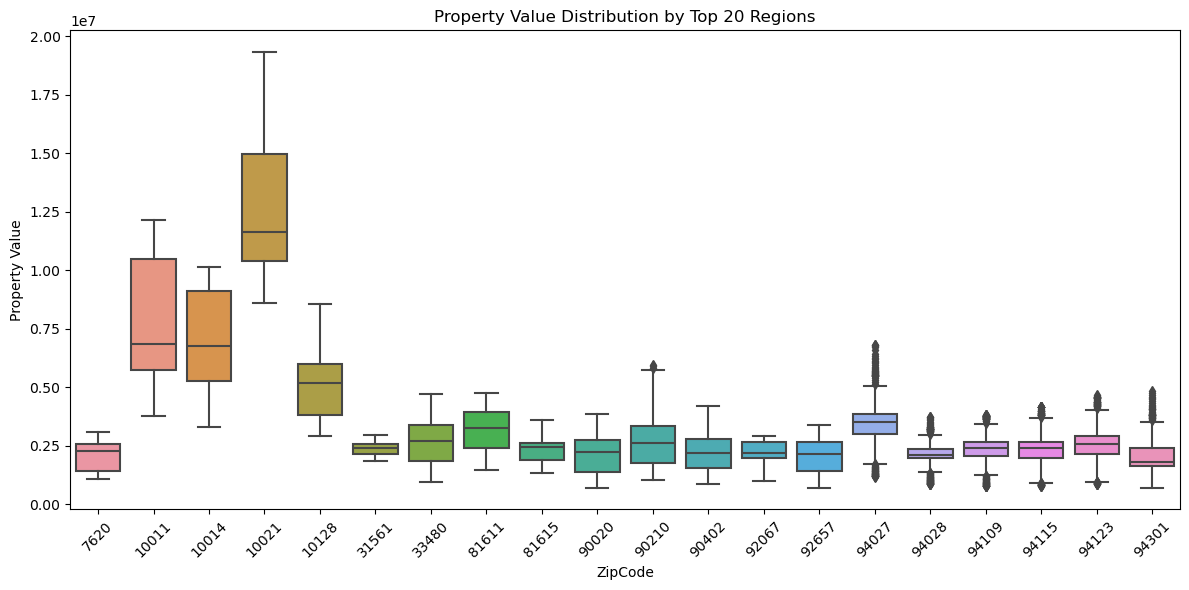

In [58]:
# Checking for outliers
# Box plot
plt.figure(figsize=(12, 6))
top_regions = df.groupby('ZipCode')['value'].mean().nlargest(20).index
top_data = df[df['ZipCode'].isin(top_regions)]
sns.boxplot(x='ZipCode', y='value', data=top_data)
plt.title("Property Value Distribution by Top 20 Regions")
plt.xlabel("ZipCode")
plt.ylabel("Property Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

The dataset shows that certain zip codes have outliers in their price data. However, this might accurately reflect the actual prices in those specific areas.

### Feature Enginering

In [60]:
# Calculate the initial and final values for each ZipCode
initial_values = df.groupby('ZipCode').first()['value']
final_values = df.groupby('ZipCode').last()['value']

# Calculate ROI for each ZipCode
roi = (final_values - initial_values) / initial_values * 100

In [61]:
# Convert the Series to a DataFrame for easier handling
roi_df = roi.reset_index()
roi_df.columns = ['ZipCode', 'ROI']

# Identify the top 5 zip codes with the highest ROI
top_5_zipcodes = roi_df.nlargest(5, 'ROI')

top_5_zipcodes

,ZipCode,ROI
1565,11211,1118.993994
1575,11222,1053.552279
1569,11216,994.250513
993,7302,940.306122
1568,11215,894.195835


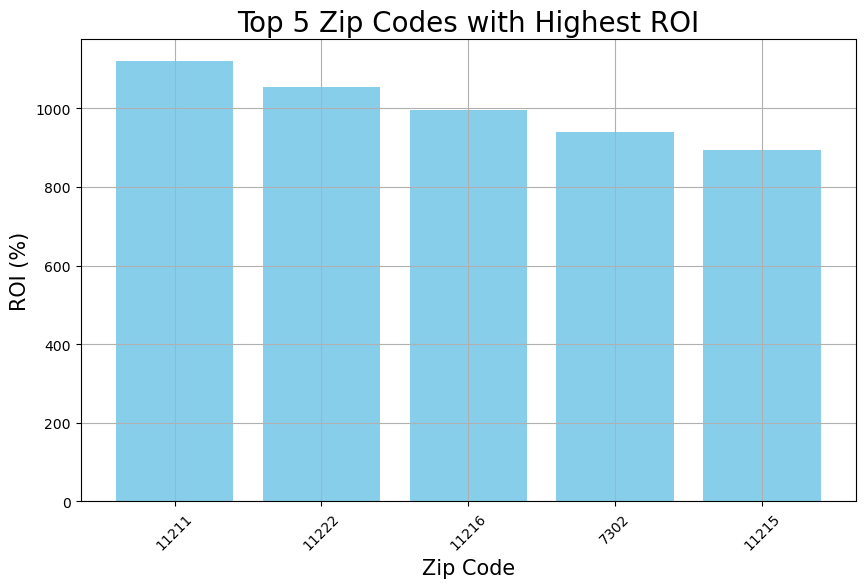

In [62]:
# Plot the bar graph for the top 5 zip codes
plt.figure(figsize=(10, 6))
plt.bar(top_5_zipcodes['ZipCode'].astype(str), top_5_zipcodes['ROI'], color='skyblue')
plt.xlabel('Zip Code', fontsize=15)
plt.ylabel('ROI (%)', fontsize=15)
plt.title('Top 5 Zip Codes with Highest ROI', fontsize=20)
plt.xticks(rotation=45)
plt.grid(True)
plt.show();

In [64]:
data = pd.merge(df, top_5_zipcodes, on='ZipCode')
data.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,Date,value,ROI
0,62026,11215,New York,NY,Kings,107,1996-04-01 00:00:00,225700.0,894.195835
1,62026,11215,New York,NY,Kings,107,1996-05-01 00:00:00,227500.0,894.195835
2,62026,11215,New York,NY,Kings,107,1996-06-01 00:00:00,229400.0,894.195835
3,62026,11215,New York,NY,Kings,107,1996-07-01 00:00:00,231600.0,894.195835
4,62026,11215,New York,NY,Kings,107,1996-08-01 00:00:00,234100.0,894.195835


In [65]:
data.columns

Index(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank',
       'Date', 'value', 'ROI'],
      dtype='object')

In [66]:
data.shape

(1325, 9)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1325 non-null   int64  
 1   ZipCode     1325 non-null   int64  
 2   City        1325 non-null   object 
 3   State       1325 non-null   object 
 4   CountyName  1325 non-null   object 
 5   SizeRank    1325 non-null   int64  
 6   Date        1325 non-null   object 
 7   value       1325 non-null   float64
 8   ROI         1325 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 93.3+ KB


In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,1325.0,61749.400000,555.420799,60639.000000,62022.000000,62026.000000,62027.000000,6.203300e+04
ZipCode,1325.0,10433.200000,1566.195089,7302.000000,11211.000000,11215.000000,11216.000000,1.122200e+04
SizeRank,1325.0,409.800000,396.500203,107.000000,118.000000,192.000000,476.000000,1.156000e+03
value,1325.0,695788.000000,478926.382494,131500.000000,274700.000000,625300.000000,947100.000000,2.288900e+06
ROI,1325.0,1000.259749,79.802316,894.195835,940.306122,994.250513,1053.552279,1.118994e+03


In [72]:
#statistical description of categorical variables
data.describe(include=['object'])

,City,State,CountyName,Date
count,1325,1325,1325,1325
unique,2,2,2,265
top,New York,NY,Kings,1996-04-01 00:00:00
freq,1060,1060,1060,5


## 3.2 Resampling

Monthly data

In [23]:
# Extract year
data['Year'] = data['Date'].dt.year

# Group by year and calculate mean
df_monthly = data.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'Date']).agg({'value': 'mean', 'ROIPrice': 'mean'}).reset_index()

# Extract year and quarter
df_monthly['year'] = df_monthly['Date'].dt.year
df_monthly['quarter'] = df_monthly['Date'].dt.quarter

# Group by year, quarter, and other columns, then calculate mean
df_quarterly = df_monthly.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'year', 'quarter']).agg({'Price': 'mean', 'ROIPrice': 'mean'}).reset_index()

# Display the result
df_quarterly

# Set the 'Date' column as the index
df_monthly.set_index('Date', inplace=True)

# Sort the DataFrame by the datetime index
df_monthly.sort_index(inplace=True)

# Display the DataFrame to verify the changes
df_monthly.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,Price,ROIPrice,year,quarter
Date,,,,,,,,,,
1996-04-01,58196,1001,Agawam,MA,Hampden,5851,113100.0,21899.0,1996,2
1996-04-01,96447,91602,Los Angeles,CA,Los Angeles,4404,256200.0,518499.0,1996,2
1996-04-01,65567,18661,White Haven,PA,Luzerne,9999,57600.0,-1801.0,1996,2
1996-04-01,65566,18660,Mountain Top,PA,Luzerne,11904,68800.0,1399.0,1996,2
1996-04-01,96449,91604,Los Angeles,CA,Los Angeles,2058,335400.0,525099.0,1996,2


Quaterly data

In [24]:
# Extract year and quarter
df_monthly['year'] = df_monthly.index.year
df_monthly['quarter'] = df_monthly.index.quarter

# Group by year, quarter, and other columns, then calculate mean
df_quarterly = df_monthly.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'year', 'quarter']).agg({'Price': 'mean', 'ROIPrice': 'mean'}).reset_index()

# Display the result
df_quarterly.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,year,quarter,Price,ROIPrice
0,58196,1001,Agawam,MA,Hampden,5851,1996,2,112833.333333,21899.0
1,58196,1001,Agawam,MA,Hampden,5851,1996,3,112100.000000,21899.0
2,58196,1001,Agawam,MA,Hampden,5851,1996,4,111733.333333,21899.0
3,58196,1001,Agawam,MA,Hampden,5851,1997,1,112100.000000,21899.0
4,58196,1001,Agawam,MA,Hampden,5851,1997,2,112766.666667,21899.0


Yearly data

In [25]:
# Extract year
data['year'] = data['Date'].dt.year

# Group by year and calculate mean
df_yearly = data.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'year']).agg({'Price': 'mean', 'ROIPrice': 'mean'}).reset_index()

# Display the result
df_yearly.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,year,Price,ROIPrice
0,58196,1001,Agawam,MA,Hampden,5851,1996,112222.222222,21899.0
1,58196,1001,Agawam,MA,Hampden,5851,1997,113241.666667,21899.0
2,58196,1001,Agawam,MA,Hampden,5851,1998,116516.666667,21899.0
3,58196,1001,Agawam,MA,Hampden,5851,1999,120200.000000,21899.0
4,58196,1001,Agawam,MA,Hampden,5851,2000,126225.000000,21899.0


# Exploratory Data Analysis

This section focuses on visualizing popular counties, cities, and states, while analyzing housing prices in various states and the return on investment (ROI) for the five top-performing zip codes 

## 1.Univariate analysis




### Top 10 Most Popular Counties

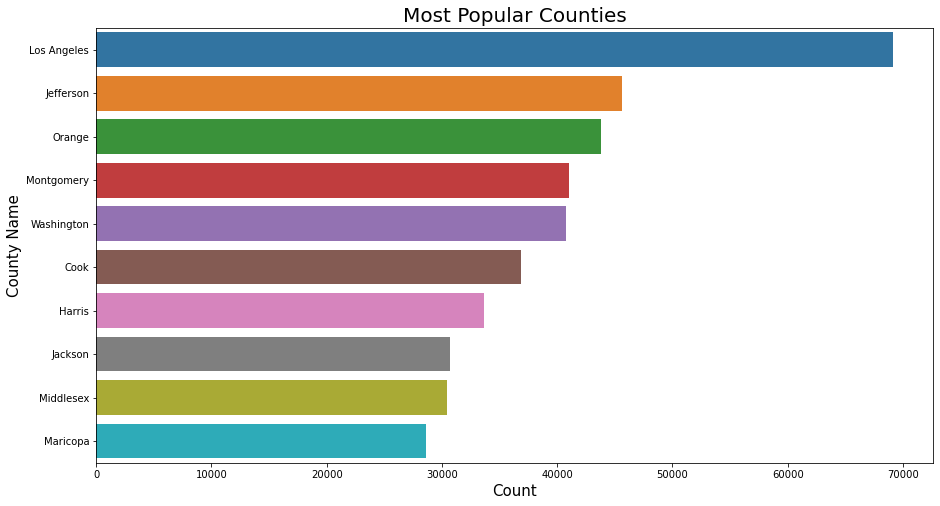

In [26]:
# plotting the most popular counties in the dataset
plt.figure(figsize=(15,8))
sns.countplot(y='CountyName', data=data, order=data['CountyName'].value_counts().index[:10])
plt.xlabel("Count",fontsize=15)
plt.ylabel("County Name",fontsize=15)
plt.title("Most Popular Counties",fontsize=20);

Based on the bar graph above, it is evident that Los Angeles is the most popular county, featuring approximately 70,000 zip codes. In contrast, most other counties have zip code counts ranging from 30,000 to 50,000.

### The Most Popular Cities

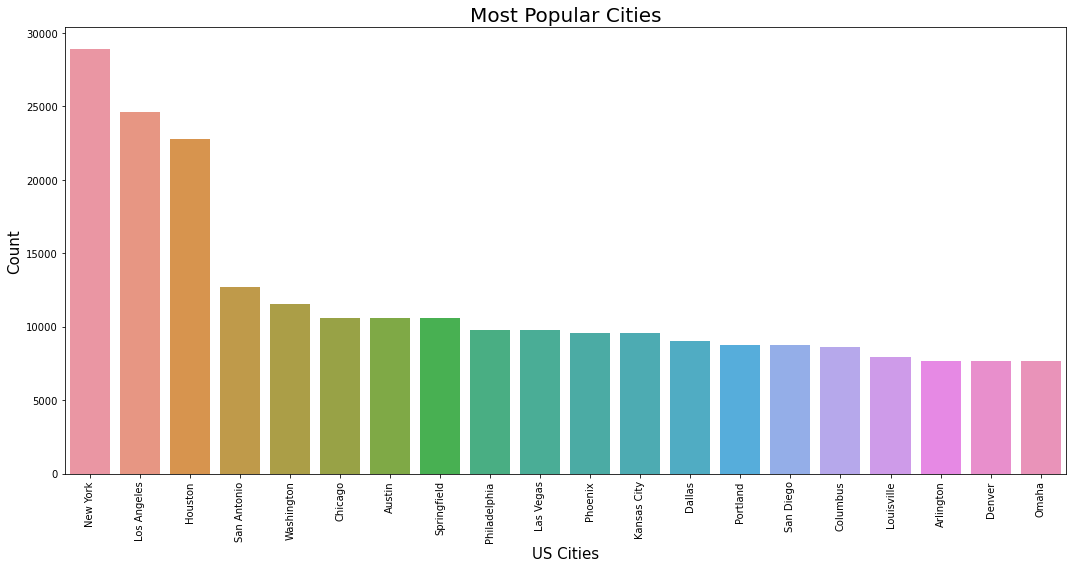

In [27]:
# plotting the most popular cities in the dataset
plt.figure(figsize=(15,8))
sns.countplot(x='City', data=data, order=data.City.value_counts().index[:20])
plt.xlabel("US Cities",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Most Popular Cities",fontsize=20)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout for better spacing
plt.show()

From the dataset, we can conclude that New York City, Los Angeles, and Houston are the most popular cities, each having over 20,000 zip codes. In contrast, other cities have fewer than 15,000 zip codes.

 ### Top 10 Most Popular States

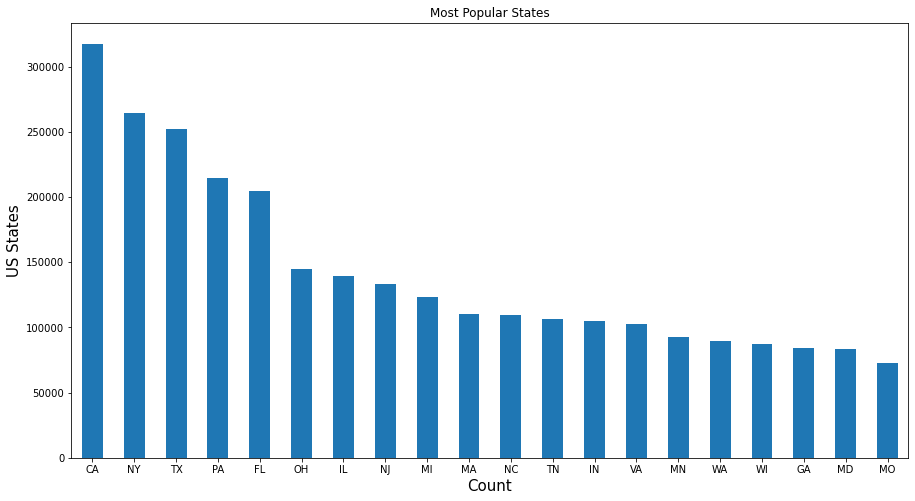

In [28]:
# plotting the most popular states in the dataset
plt.figure(figsize=(15,8))
data.State.value_counts()[:20].plot(kind="bar")
plt.xlabel("Count",fontsize=15)
plt.ylabel("US States",fontsize=15)
plt.xticks(rotation=0)
plt.title("Most Popular States",fontsize=12);

The graph above indicates that California(CA) is the most popular state, boasting over 300,000 zip codes. Following closely are New York with approximately 270,000 zip codes and Texas with around 260,000. Other states have zip code counts below 250,000.

## 2. Bivariate analysis

### Top states based on average prices over years

The cell below visualizes top states with the highest property valuve over a period of time.

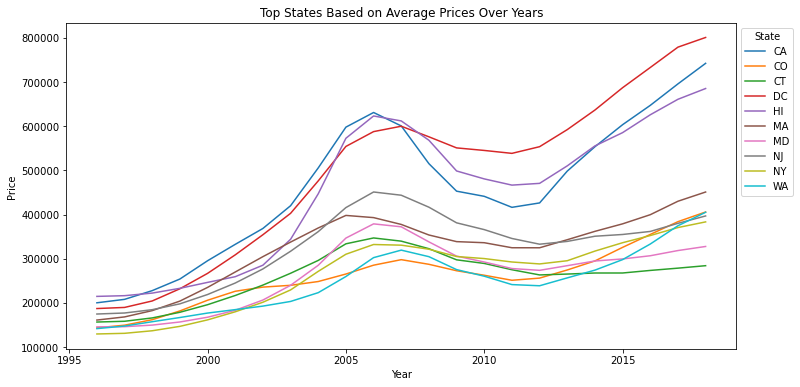

In [29]:
#Checking top 10 states based on average prices per year

# Calculate average prices by state
average_prices_by_state = data.groupby(['Year', 'State'])['Price'].mean().reset_index()

# Get top states based on average prices
top_states = average_prices_by_state.groupby('State')['Price'].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only top states
df_top_states = average_prices_by_state[average_prices_by_state['State'].isin(top_states)]

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Price', hue='State', data=df_top_states, ci=None)
plt.title('Top States Based on Average Prices Over Years')
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.show()

As observed, the percentage of return on investments for the top ten states experienced a significant decline from 2008 to 2012. However, since then, there has been a consistent upward trend. This indicates that the rise in investment returns began in 2012, with 2018 marking the peak year for returns.

### Home Prices by Zipcode over years

The code  filters the best 5 zipcodes based on Return on investment(ROI) and visualizes the result from 1996 to 2018 and shows the trend

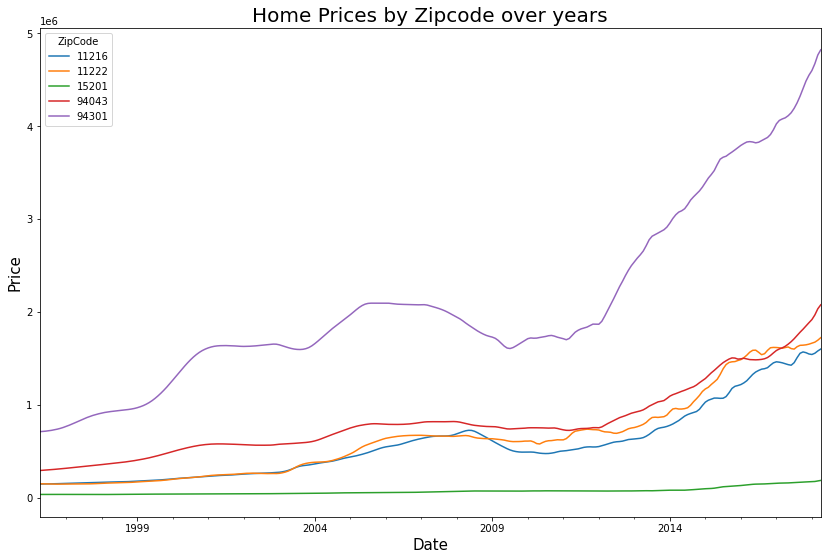

In [30]:
# Filter form the top 5 zipcodes based on %ROI
zipcodes = data.sort_values('%ROI', ascending=False)['ZipCode'].unique()[:5]
top_5 = data[data['ZipCode'].isin(zipcodes)]

# Group data by date and zipcode, and calculate the mean price for each group
grouped = top_5.groupby(['Date', 'ZipCode']).mean().reset_index()

# Pivot the data to get the zipcodes as columns and the dates as rows
pivoted = grouped.pivot(index='Date', columns='ZipCode', values='Price')

# Plot the data as a line graph
pivoted.plot(kind='line', figsize=(14,9))
plt.title('Home Prices by Zipcode over years',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Based on the observations above, it's clear that zip code counts have shown a steady rise since 1996, with minimal fluctuations. However, there was a decline starting in 2008, followed by a consistent increase from 2012 onward. Notably, 94301 has the highest return compared to the other five zip codes.

#### Average housing price over the years

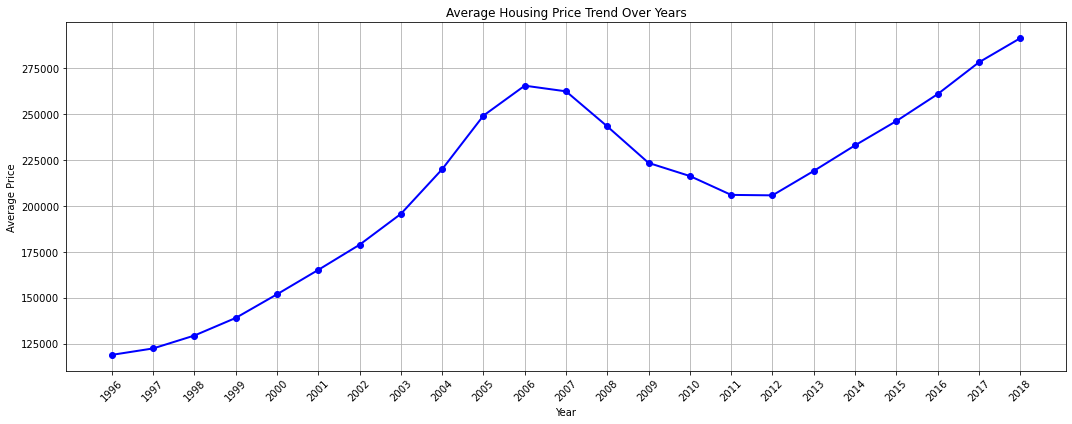

In [31]:
# Calculating average price per year

data['Year'] = data['Date'].dt.year
average_prices = data.groupby('Year')['Price'].mean()
# Creating a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))
# Ploting the data
ax.plot(average_prices.index, average_prices.values, label='Average Price', color='blue', linewidth=2, marker='o')
# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.set_title('Average Housing Price Trend Over Years')
# Adding grid lines
ax.grid(True)
# Customizing x-axis ticks for each year
plt.xticks(average_prices.index, rotation=45)
# Tight layout
plt.tight_layout()
# Show the plot
plt.show()

The graph illustrates that the average housing price has been steadily increasing over the years, with a significant dip between 2007 and 2012. Since then, the average housing price has rebounded and continued to rise.

#### Property prices of the top 20

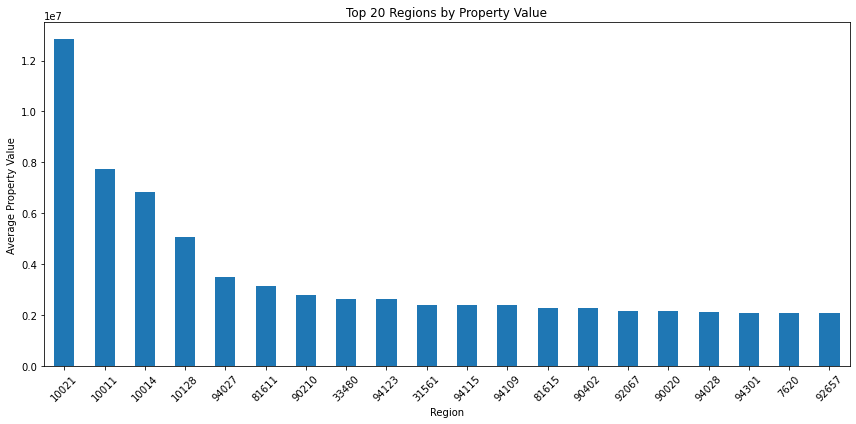

In [32]:
# Checking on top 20 regions by property prices

plt.figure(figsize=(12, 6))
top_regions = data.groupby('ZipCode')['Price'].mean().nlargest(20)
top_regions.plot(kind='bar')
plt.title("Top 20 Regions by Property Value")
plt.xlabel("Region")
plt.ylabel("Average Property Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Zip codes 10021, 10011, 10014, and 10128 in New York feature properties with the highest values, followed by 94027 in California and 81611 in Colorado. The remaining zip codes have property values ranging between 2 to 3 million.

In [33]:
# Here we try to group the  data to get the zipcodes with high property ratings. 
group_metropolitan = pd.DataFrame(df_monthly.groupby(['CountyName','ZipCode'])['ROIPrice'].agg('mean').sort_values(ascending=False).head(30))
group_metropolitan 

ROIPrice
CountyName    ZipCode           
New York      10021    6938599.0
              10011    5288699.0
San Mateo     94027    3594499.0
Los Angeles   90210    3384199.0
Santa Clara   94301    3091499.0
New York      10014    2970399.0
Santa Clara   94022    2606999.0
              94024    2079399.0
Kings         11217    2077199.0
Santa Clara   94305    2064399.0
San Francisco 94123    2025999.0
Palm Beach    33480    1996199.0
Los Angeles   90402    1967299.0
Santa Clara   94306    1946599.0
              94040    1745799.0
Suffolk       11975    1726799.0
San Mateo     94028    1717399.0
New York      11231    1712199.0
San Francisco 94115    1680699.0
New York      10128    1667499.0
Santa Clara   94303    1649399.0
Kings         11238    1633399.0
Los Angeles   90020    1623299.0
              90049    1577899.0
Santa Clara   95070    1575899.0
Los Angeles   90069    1564199.0
              90272    1534199.0
              90212    1515299.0
              90265    1507299.0
Santa Clara   95030    1472899.0

## Baseline model

In this setion we will create a baseline model which will serve as a reference point for comparison with the more complex model.

By evaluating the performance of our sophisticated models against our baseiline model, we will be able to determine if the added complexity and computational effort are justified by a significant improvement in the perfromance.

The baseline model will aslo help in understanding the basic characteristics of our features.
It will also provide a baseline accuracy to measure the relative efectiveness of the next comlex model we will use.

Since most time series data always has the component of trend and sesonality, the ARIMA models have the idea of differencing to ensure stationarity. This is also one of the assumptions of ARMA models. 

In [34]:
#Counter check the date column is the index
df_monthly.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,Price,ROIPrice,year,quarter
Date,,,,,,,,,,
1996-04-01,58196,1001,Agawam,MA,Hampden,5851,113100.0,21899.0,1996,2
1996-04-01,96447,91602,Los Angeles,CA,Los Angeles,4404,256200.0,518499.0,1996,2
1996-04-01,65567,18661,White Haven,PA,Luzerne,9999,57600.0,-1801.0,1996,2
1996-04-01,65566,18660,Mountain Top,PA,Luzerne,11904,68800.0,1399.0,1996,2
1996-04-01,96449,91604,Los Angeles,CA,Los Angeles,2058,335400.0,525099.0,1996,2


In [35]:
print(data.dtypes)

RegionID               int64
ZipCode               object
SizeRank               int64
City                  object
State                 object
Metro                 object
CountyName            object
%ROI                 float64
ROIPrice             float64
Date          datetime64[ns]
Price                float64
Year                   int64
year                   int64
dtype: object


With the knowledge that it would be difficult to use the whole datasets we will use afew features. We seek to narrow down the forecast to only the afore mentioned **top 30 zipcodes** with the highest prices. 

In [36]:
# Baseline model for forecast of specific zip codes. 
unique_counties = group_metropolitan.index.get_level_values('ZipCode')


tsc = TimeSeriesSplit(n_splits=5)

all_train_dates, all_test_dates = [], []
all_train_values, all_test_values = [], []
all_forecasts = []

results_list1 = []

for county in unique_counties:
    county_data = df_monthly[df_monthly['ZipCode'] == county]

    # Split the data 
    dates = county_data.index
    values = county_data['ROIPrice'].values

    # accumulate values for each fold
    zip_train_dates, zip_test_dates = [], []
    zip_train_values, zip_test_values = [], []

    for train_index, test_index in tsc.split(dates):
        train_dates, test_dates = dates[train_index], dates[test_index]
        train_values, test_values = values[train_index], values[test_index]

        zip_train_dates.extend(train_dates)
        zip_test_dates.extend(test_dates)
        zip_train_values.extend(train_values)
        zip_test_values.extend(test_values)

        baseline_model = ARIMA(train_values, order=(1, 0, 1)).fit()
        forecast = pd.Series(baseline_model.predict(start=len(train_values), end=len(train_values) + 11, typ='levels'))
        
        print(baseline_model.summary())

        all_forecasts.extend(forecast)
        forecasted_value = forecast.iloc[-1]
        real_value = test_values[-1]
        percentage_change = ((forecasted_value - real_value) / real_value) * 100
        # Append the forecasted values to the list 
        results_list1.append({'County': county, 'Forecast': forecasted_value, 'Real': real_value, 'Percentage Change': percentage_change})


results_df = pd.DataFrame(results_list1)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 340.422
Date:                Fri, 26 Jul 2024   AIC                           -672.843
Time:                        15:29:08   BIC                           -666.980
Sample:                             0   HQIC                          -670.900
                                 - 32                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e+06   2.88e-13   2.41e+19      0.000    6.94e+06    6.94e+06
ar.L1       1.507e-17   1.35e-18     11.184      0.000    1.24e-17    1.77e-17
ma.L1        4.29e-16   1.35e-18    318.493      0.0

In [37]:
results_df.head()

,County,Forecast,Real,Percentage Change
0,10021,6.938599e+06,6938599.0,-6.952774e-11
1,10021,6.938599e+06,6938599.0,-6.952774e-11
2,10021,6.938599e+06,6938599.0,-6.952774e-11
3,10021,6.938599e+06,6938599.0,-6.952774e-11
4,10021,6.938599e+06,6938599.0,-6.954116e-11


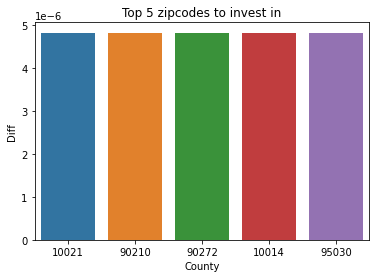

In [38]:
#Plotting the zipcodes with high forecasted values
avg_results = results_df.groupby('County')[['Forecast', 'Real']].mean().reset_index()
avg_results['Diff'] =avg_results['Real'] - avg_results['Forecast']
top_5 = avg_results.sort_values(by='Diff', ascending=False).head(5)
sns.barplot(data=top_5, x='County', y='Diff')
plt.title("Top 5 zipcodes to invest in")
plt.show()